In [10]:
# Required Libraries
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



In [11]:
# Load Dataset
df = pd.read_csv(r"C:\Users\vidhi\OneDrive\Documents\Healthcare Prediction Using ML\Datasets\parkinson_data.csv")
print("Dataset loaded successfully.")



Dataset loaded successfully.


In [12]:

# Identify Target Column
target_column = "status"
if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found.")

# Data Preprocessing
df.replace("?", np.nan, inplace=True)  # Replace "?" with NaN
df.dropna(axis=1, thresh=0.9 * len(df), inplace=True)  # Drop columns with >10% missing values

# Apply imputation (for all columns)
imputer = SimpleImputer(strategy="most_frequent")  # Use most frequent values for categorical & numerical
df[df.columns] = imputer.fit_transform(df)

# Convert all data to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Split Features & Target
X = df.drop(columns=[target_column])  # Features
y = df[target_column].astype(int)  # Target

# Check for NaN values after preprocessing
print("Missing values after preprocessing:\n", X.isnull().sum())

# Handle any remaining NaN values (if any exist)
imputer = SimpleImputer(strategy="mean")  
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Final check for NaN values
if np.isnan(X).sum().sum() > 0:
    raise ValueError("NaN values still present after imputation!")

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Final check after scaling
if np.isnan(X_train_scaled).sum() > 0 or np.isnan(X_test_scaled).sum() > 0:
    raise ValueError("NaN values still present in the dataset after preprocessing.")

print("Data Preprocessing Completed Successfully!")


Missing values after preprocessing:
 MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64
Data Preprocessing Completed Successfully!


In [13]:


# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}


# Train, predict and evaluate
best_model = None
best_model_name = ""
best_accuracy = 0

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_model_name = name
        


Logistic Regression Accuracy: 0.8974
Decision Tree Accuracy: 0.9231
Random Forest Accuracy: 0.9487
SVM Accuracy: 0.8974
KNN Accuracy: 0.9487


In [17]:

# Save best model and scaler
with open("models/best_parkinsons_model.sav", "wb") as f:
    pickle.dump((scaler, best_model), f)
    

print(f"\n✅ Best Model: {best_model_name} with accuracy {best_accuracy:.4f}")
print("📦 Saved to: models/best_parkinsons_model.sav")



✅ Best Model: Random Forest with accuracy 0.9487
📦 Saved to: models/best_parkinsons_model.sav


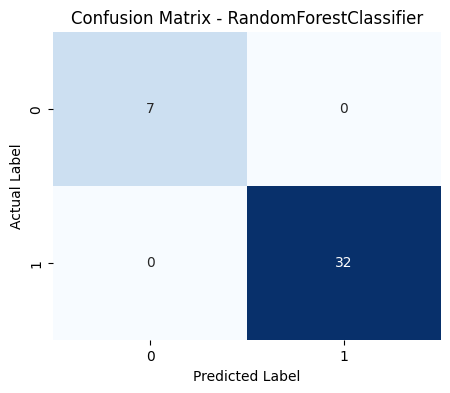

In [18]:

# Ensure both y_test and y_pred_best are same type (convert to string)
y_test_str = y_test.astype(str)
y_pred_best_str = pd.Series(y_test).astype(str)

# Now compute confusion matrix
cm = confusion_matrix(y_test_str, y_pred_best_str)

# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - {best_model.__class__.__name__}')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


In [19]:
# Example input 
input_data = (119.992, 157.302, 74.997, 0.00784, 0.00007, 0.0037, 0.00554, 0.011, 0.018, 0.026, 0.165, 0.00908, 0.01583, 0.016, 0.019, 0.031, 20.88, 0.414, 0.813, -4.813, 0.233, 2.056, 0.362)  # Example input

#  Check number of features in training dataset
expected_features = X.shape[1]  
actual_features = len(input_data)

print(f"Expected features: {expected_features}, Given features: {actual_features}")

# Ensure input data has the correct number of features
if actual_features > expected_features:
    input_data = input_data[:expected_features]  
elif actual_features < expected_features:
    raise ValueError(f"Input data is missing {expected_features - actual_features} features!")

# Convert input data to numpy array & reshape
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)

#  Predict using Best Model
prediction = best_model.predict(input_data_as_numpy_array)

#  Display Prediction Result
if prediction[0] == "0":
    print("The Person does not have Parkinson’s Disease")
else:
    print("The Person has Parkinson’s Disease")


Expected features: 22, Given features: 23
The Person has Parkinson’s Disease
